Youtube link: https://www.youtube.com/watch?v=6GUZXDef2U0

Open Questions:
- What is kde curves and how does it calculate the curves for a single variable?

# Seaborn
- Seaborn is built on top of matplotlib
- Helpful link: https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline #plot show up directly in jupyter notebook
%reload_ext autoreload
%autoreload 2

UsageError: unrecognized arguments: #plot show up directly in jupyter notebook


# Import Data

In [2]:
# these are seaborn built in datasets
print(sns.get_dataset_names())

[u'anagrams', u'anscombe', u'attention', u'brain_networks', u'car_crashes', u'diamonds', u'dots', u'exercise', u'flights', u'fmri', u'gammas', u'geyser', u'iris', u'mpg', u'penguins', u'planets', u'tips', u'titanic']


In [3]:
crash_df = sns.load_dataset('car_crashes')
print(crash_df.shape)
crash_df.head()

(51, 8)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
tips_df = sns.load_dataset('tips')
print(tips_df.shape)
tips_df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
flights = sns.load_dataset('flights')
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [49]:
iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Distribution Plot
- This is for 1 variable distributions
- Seaborn displot: https://seaborn.pydata.org/generated/seaborn.distplot.html


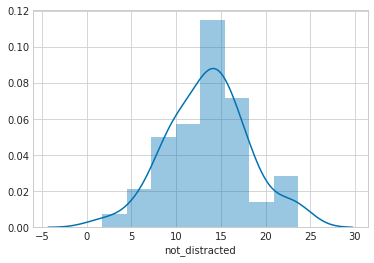

In [5]:
sns.distplot(crash_df['not_distracted'])

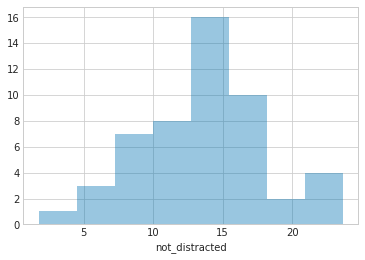

In [6]:
# to remove the gaussian kernel density estimate (kde) set kde = False
sns.distplot(crash_df['not_distracted'], kde=False)

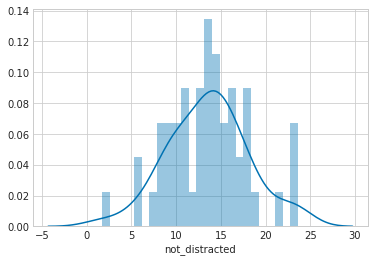

In [8]:
# Can also set the number of bins
sns.distplot(crash_df['not_distracted'], bins =25)

# Joint Plot
- Compare two distrubutions (2 variable)
- Plots a scatter plot by default
- Joint plot: https://seaborn.pydata.org/generated/seaborn.jointplot.html

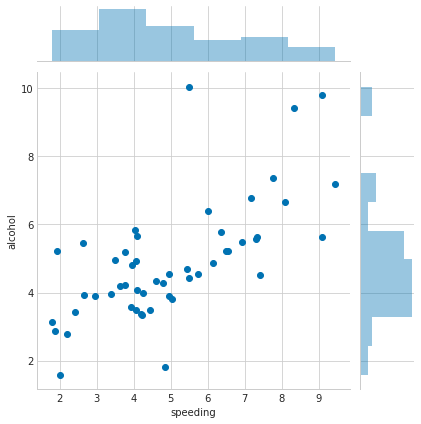

In [10]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df)

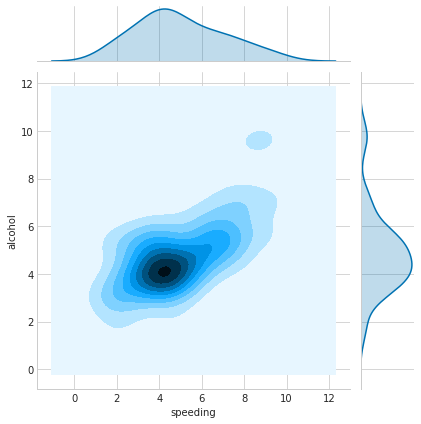

In [12]:
# Can change the kind to kde 
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

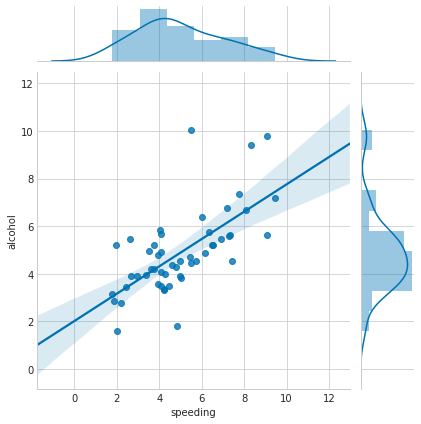

In [16]:
# Can change the kind to a regression plot between the two variables
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

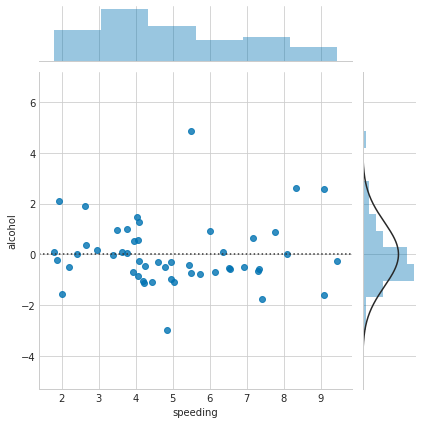

In [17]:
# Can change the kind to a residual plot between the two variables
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='resid')

# KDE Plot
- represents the data using a continuous probability density curve in one or more dimensions
- KDE plot: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

In [19]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


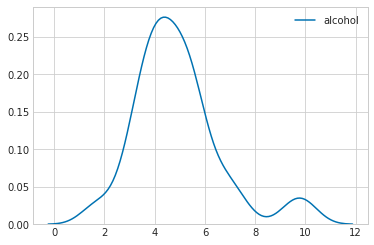

In [21]:
sns.kdeplot(crash_df['alcohol'])

# Pair Plot
- Helpful to understand your data points with respect to each other
- Pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html

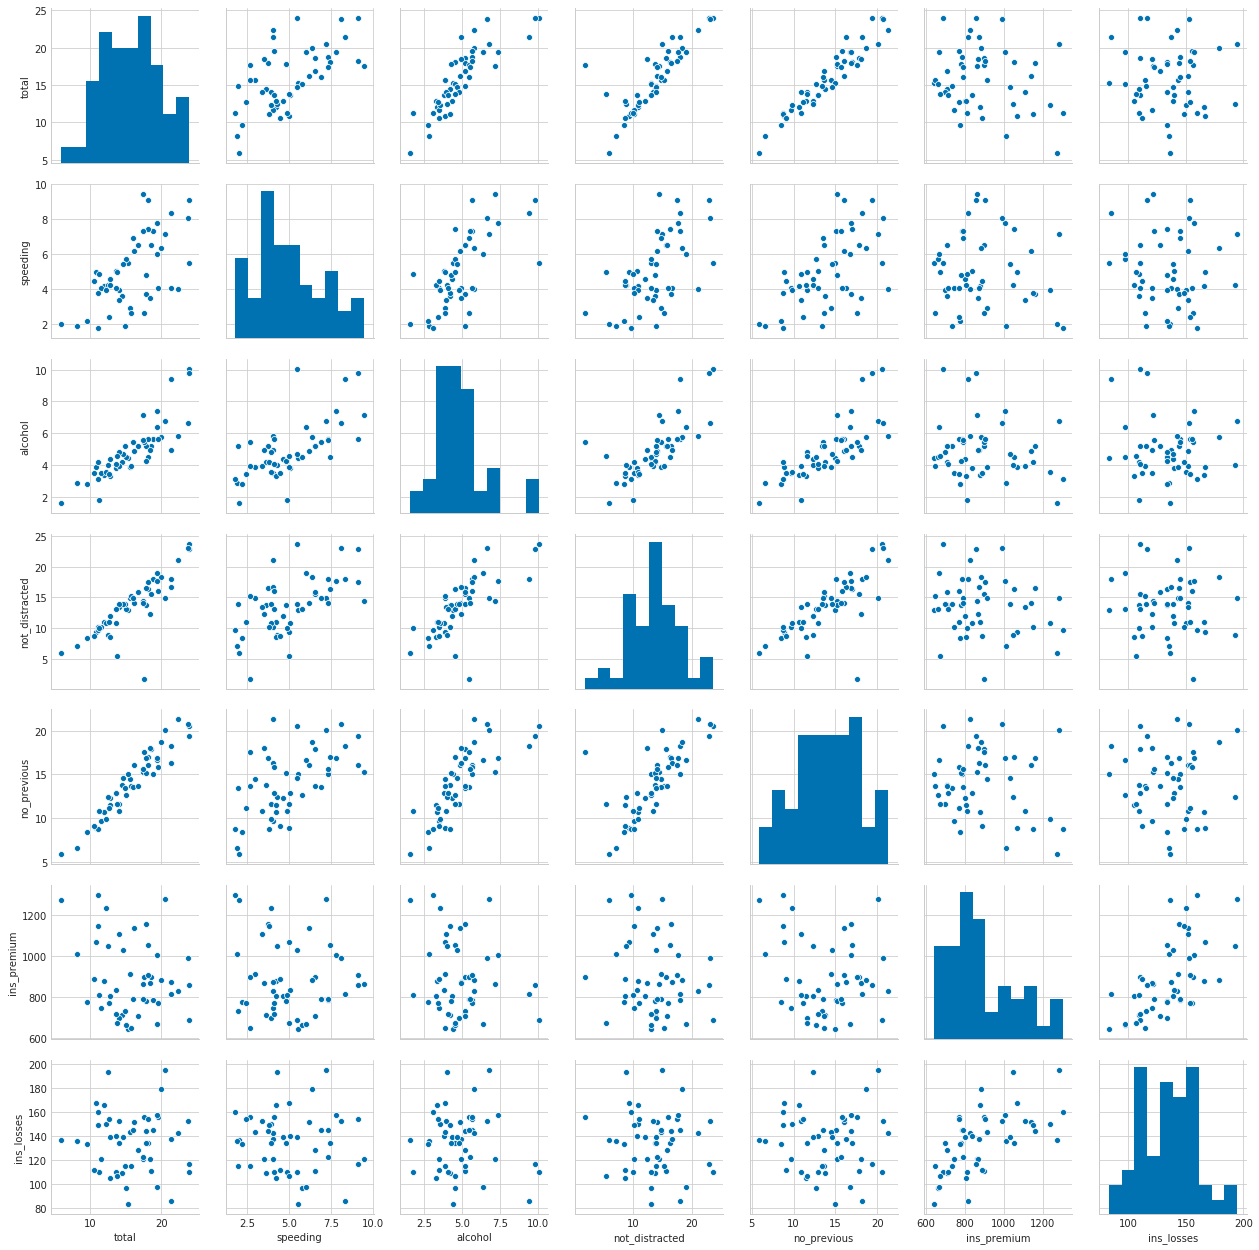

In [24]:
sns.pairplot(crash_df)

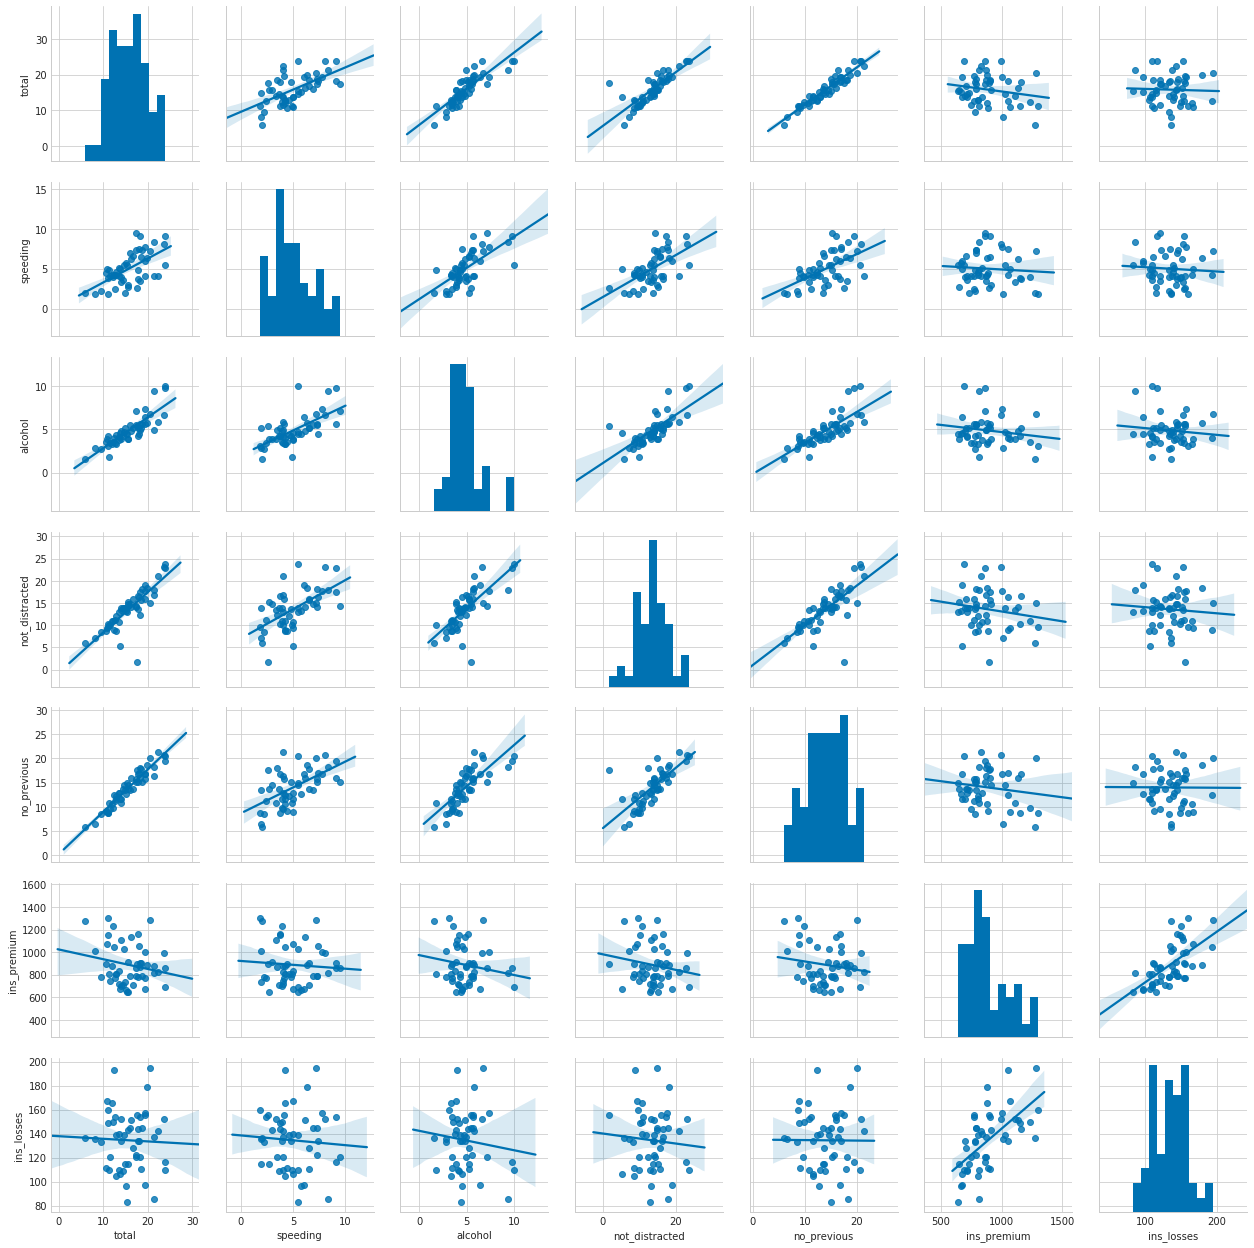

In [28]:
# Can make regression plots as well to understand the coorelation
sns.pairplot(crash_df, kind='reg')

#### Using another dataset below

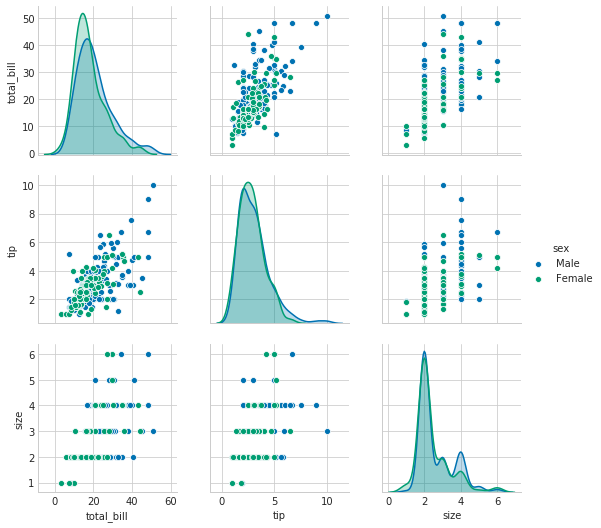

In [27]:
sns.pairplot(tips_df, hue='sex')

# Rug Plot
- For single variables, lines are thicker where most values occur
- Rug plot: https://seaborn.pydata.org/generated/seaborn.rugplot.html

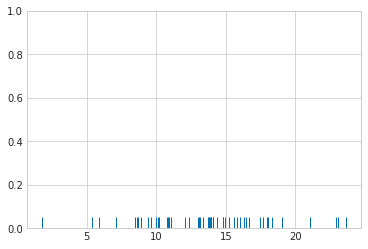

In [30]:
sns.rugplot(crash_df['not_distracted'])

# Styling

<Figure size 576x288 with 0 Axes>

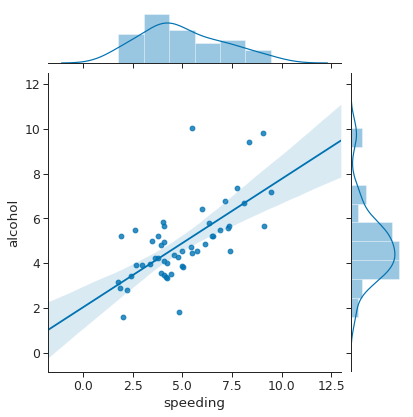

In [49]:
# change the grid of plots
# sns.set_style('white')
# sns.set_style('whitegrid')
sns.set_style('ticks')

# change the size of a plot
plt.figure(figsize=(8,4)) 

# Change the font and the overall view of the visualization
sns.set_context('paper', font_scale=1.4)
# sns.set_context('talk', font_scale=1.4)
# sns.set_context('poster') # if you want to put this chart on a poster

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Control what axes lines you want to display
# sns.despine(left=True, bottom=True, right=False, top=True)

# Categorical Plots

# Bar Plots
- Barplot: https://seaborn.pydata.org/generated/seaborn.barplot.html
- Can change the estimator parameter to anything; mean, median, count, etc.

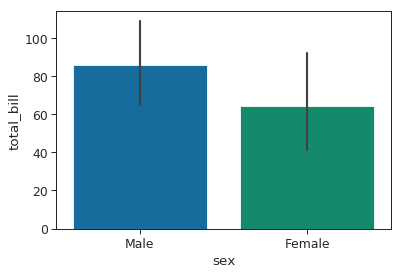

In [54]:
# default is mean as an estimator, and the line represents the variance
# sns.barplot(x='sex', y='total_bill', data=tips_df)
# sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

# Count Plot
- A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
- Counts the number of rows
- Countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

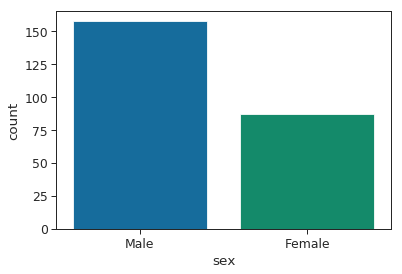

In [55]:
sns.countplot(x='sex', data=tips_df)

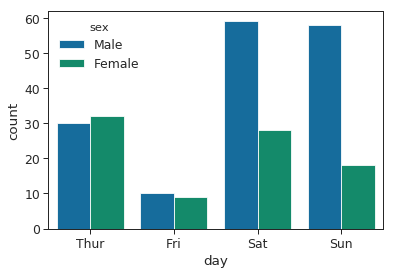

In [60]:
sns.countplot(x='day', hue='sex', data=tips_df)

# Box Plot
- boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

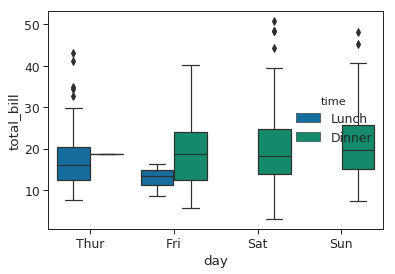

In [65]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips_df)

# Violin Plot
- helpful for comparing distributions, uses KDE
- Violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

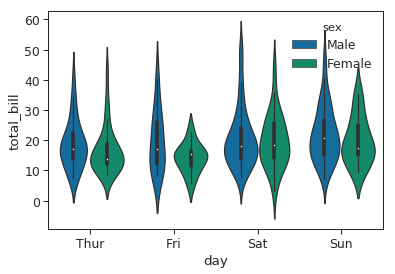

In [67]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

# Strip Plots
- Scatter plot for Catgegorical variables. Shows the density of data points. It is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
- Strip plot: https://seaborn.pydata.org/generated/seaborn.stripplot.html

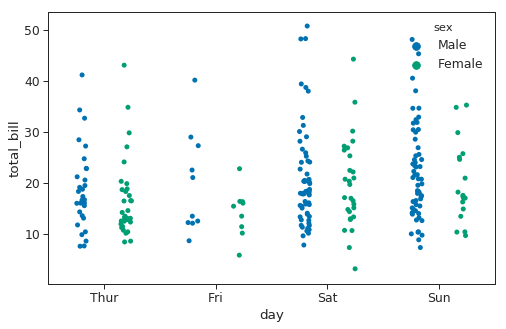

In [73]:
plt.figure(figsize=(8,5))

sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

# Swarm Plot
- This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations.
- Can use violin and swarm plot together to get a full picture of the data distribution
- Swarm plot: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

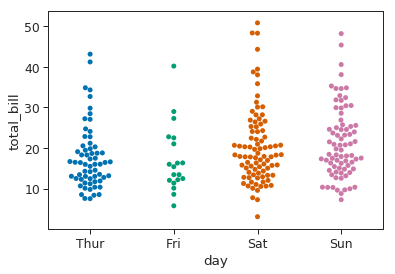

In [79]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

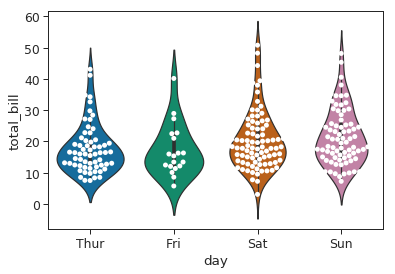

In [83]:
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

# Palletes
- Matplotlib link for different palettes: https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html
- Legend locations: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

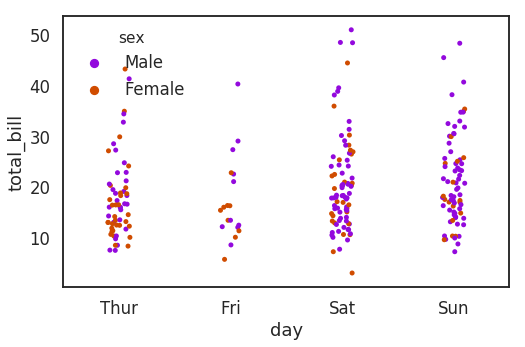

In [17]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.set_context('talk')

sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='gnuplot')


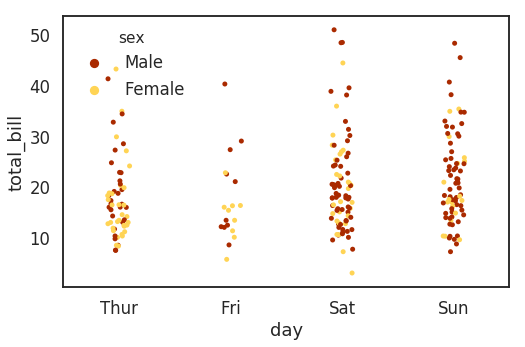

In [16]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.set_context('talk')

sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')


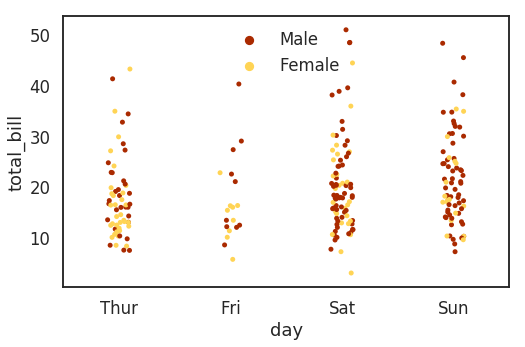

In [23]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.set_context('talk')

sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')

# Can change the location of the legend using the command below
plt.legend(loc=0)

# Matrix plots
## Heat Maps

In [24]:
crash_mx = crash_df.corr()
print(crash_mx)

                   total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000  


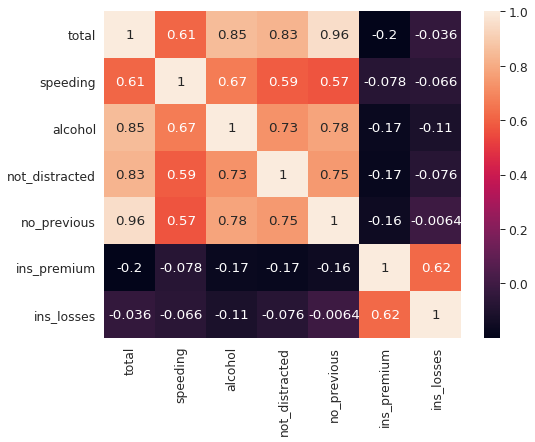

In [28]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# have to set up matrix format data
sns.heatmap(data=crash_mx, annot=True)

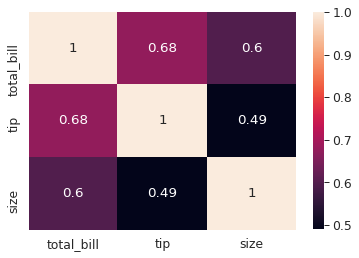

In [30]:
sns.heatmap(data=tips_df.corr(), annot=True)

In [34]:
# working with dates
flights_pv = flights.pivot_table(index='month', columns='year', values='passengers', aggfunc='mean')
flights_pv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


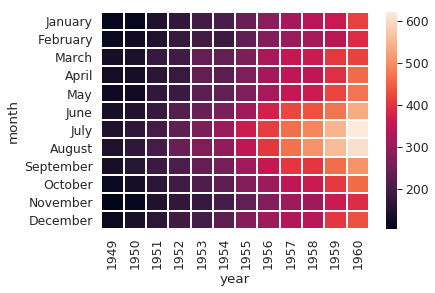

In [38]:
# Pretty cool, more people have been flighing in Aug and Jul. Furthermore, more people fly in Jul and Aug vs other months.
# Can separate the rectangles using line color and linewidth
sns.heatmap(flights_pv, linecolor='white', linewidths=1)

# Cluster Map
- Clusters the data so you can see specific patterns.
- Cluster Map: https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [50]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
species = iris_df.pop('species')

In [52]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


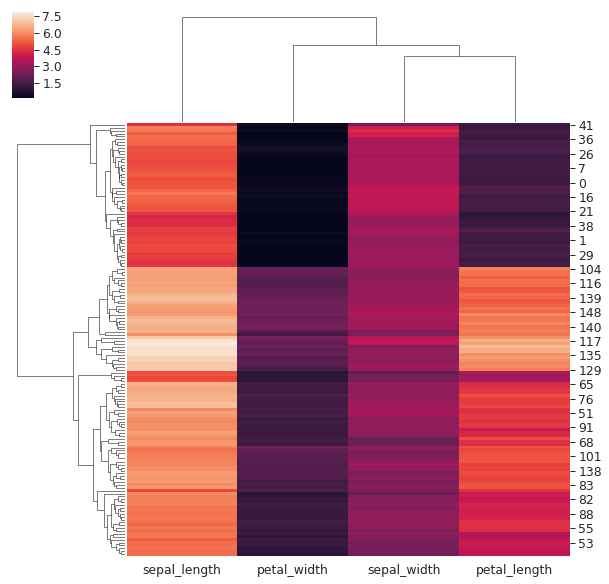

In [53]:
sns.clustermap(iris_df)

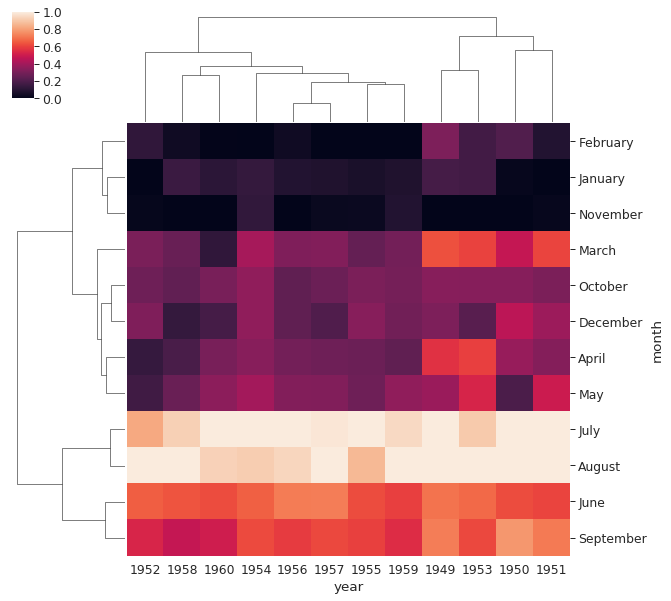

In [55]:
# use standard scale to set values of all cells between 0 and 1
sns.clustermap(flights_pv, standard_scale=1)

In [60]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
tips_df.pivot_table(index='size', columns='day', values='tip', aggfunc='sum').fillna(0)

day,Thur,Fri,Sat,Sun
size,,,,
1,1.83,1.92,2.00,0.00
2,117.24,42.31,133.43,109.86
3,10.77,3.00,68.36,46.81
4,21.09,4.73,53.61,73.58
5,5.00,0.00,3.00,12.14
6,15.90,0.00,0.00,5.00


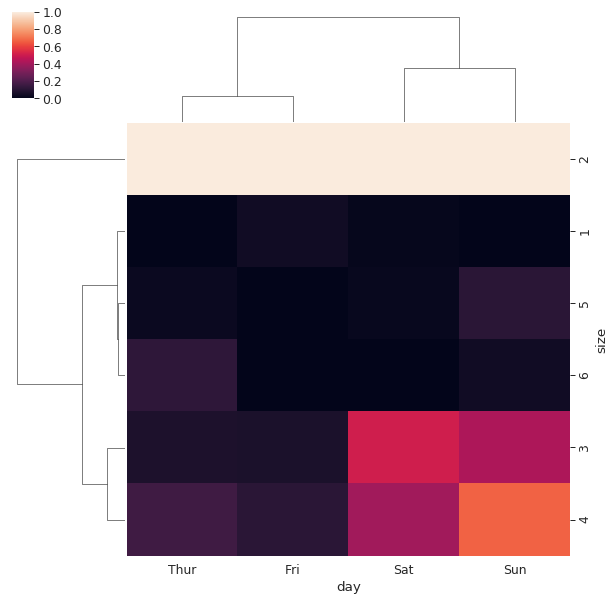

In [68]:
# If you are a party of 2, you tip fairly well
# If you are a party of 1,5 or 6, regardless of the day you do not tip well
# If you are a party of 3-4, you tip well on weekend days rather than weekdays
sns.clustermap(tips_df.pivot_table(index='size', columns='day', values='tip', aggfunc='sum').fillna(0), standard_scale=1)

## Pair Grids
- Similar to a pair plot but you get to control what type of plot you can display
- Pair grid links: https://www.tutorialspoint.com/seaborn/seaborn_pair_grid.htm#:~:text=PairGrid%20allows%20us%20to%20draw,a%20matrix%20of%20sub%2Dplots.


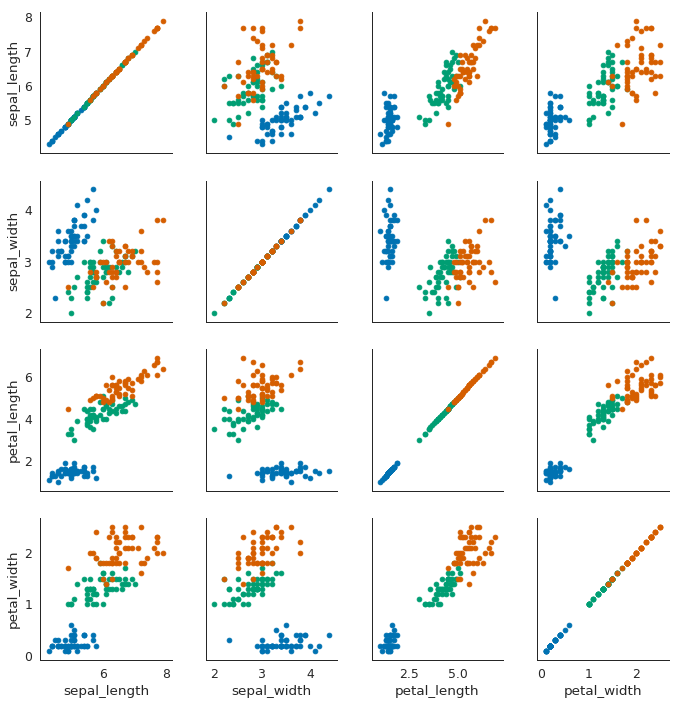

In [85]:
iris_df = sns.load_dataset('iris')
iris_grid = sns.PairGrid(iris_df, hue='species')
iris_grid.map(plt.scatter)

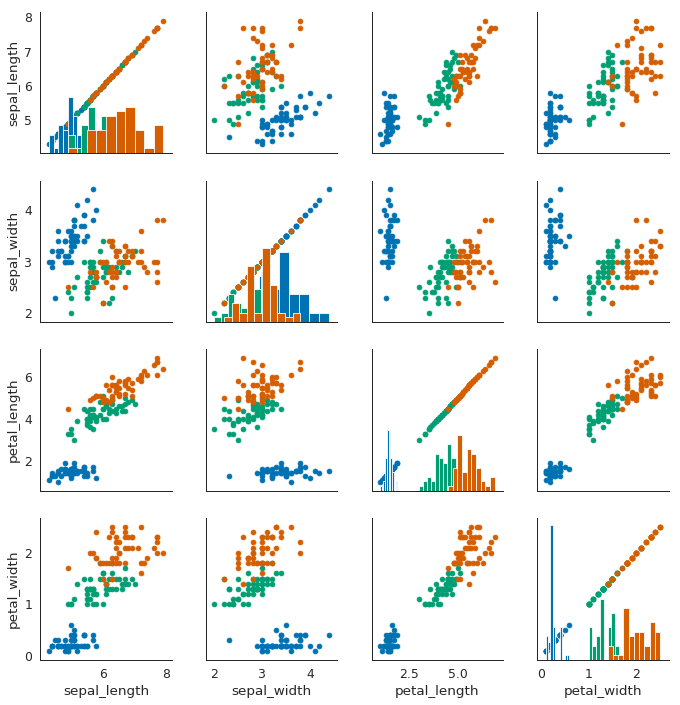

In [86]:
iris_grid = sns.PairGrid(iris_df, hue='species')
iris_grid.map(plt.scatter)
iris_grid.map_diag(plt.hist)
# iris_grid.map_offdiag(plt.hist)

# iris_grid.map_offdiag(plt.hist())

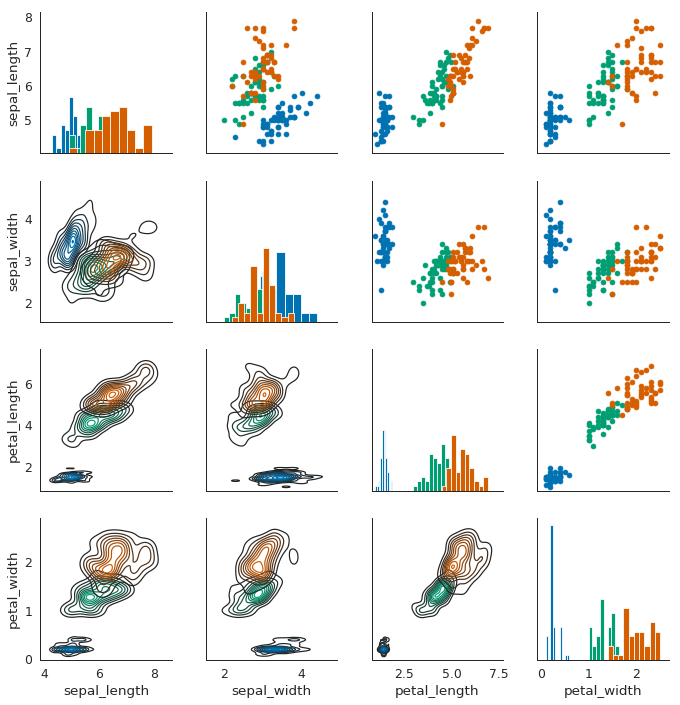

In [87]:
iris_grid = sns.PairGrid(iris_df, hue='species')
# iris_grid.map(plt.scatter)
iris_grid.map_diag(plt.hist)
iris_grid.map_upper(plt.scatter)
iris_grid.map_lower(sns.kdeplot)

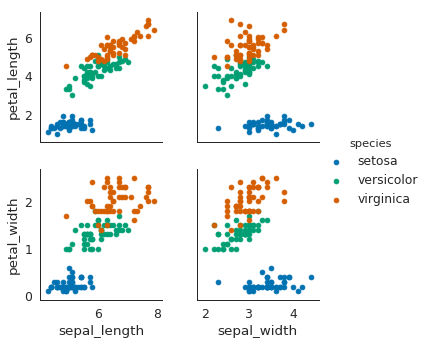

In [90]:
# iris_grid = sns.PairGrid(iris, hue='species')
iris_grid = sns.PairGrid(iris_df, hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
iris_grid.map(plt.scatter)
iris_grid.add_legend()

## Facet Grid
- Facet grid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

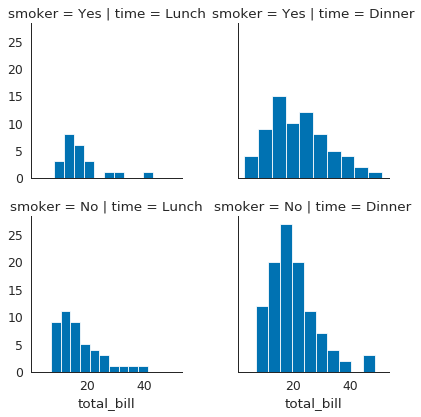

In [92]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill')

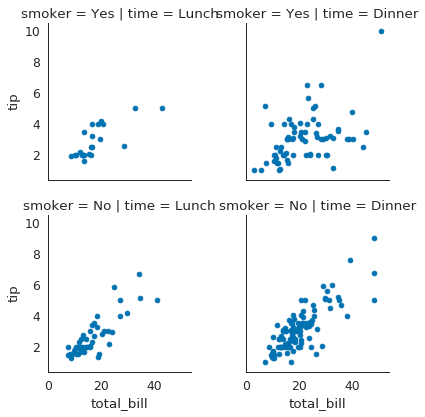

In [95]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter,'total_bill', 'tip')

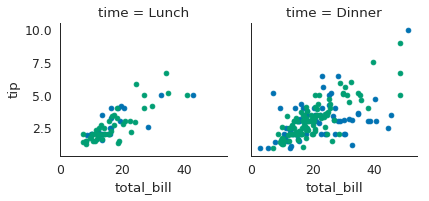

In [96]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker')
tips_fg.map(plt.scatter,'total_bill', 'tip')

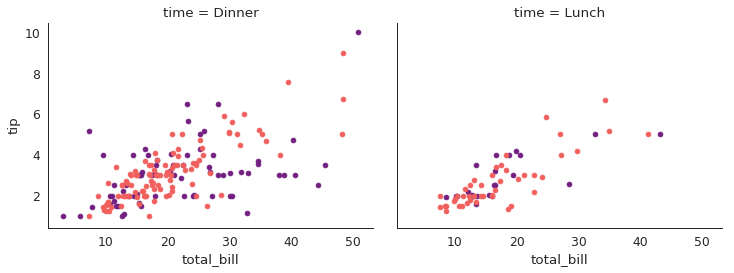

In [101]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, col_order=['Dinner', 'Lunch'], palette='magma', aspect = 1.3)
tips_fg.map(plt.scatter,'total_bill', 'tip')

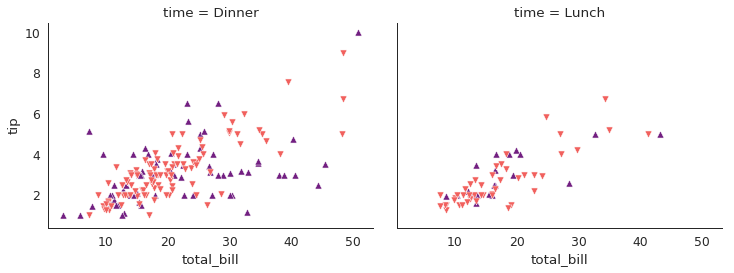

In [104]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='time', 
                        hue='smoker', hue_order=['Yes', 'No'], hue_kws=dict(marker=['^', 'v']), 
                        height=4, aspect = 1.3,
                        col_order=['Dinner', 'Lunch'], 
                        palette='magma')

tips_fg.map(plt.scatter,'total_bill', 'tip', **kws)

In [105]:
att_df = sns.load_dataset('attention')
print(att_df.shape)
att_df.head()

(60, 5)


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


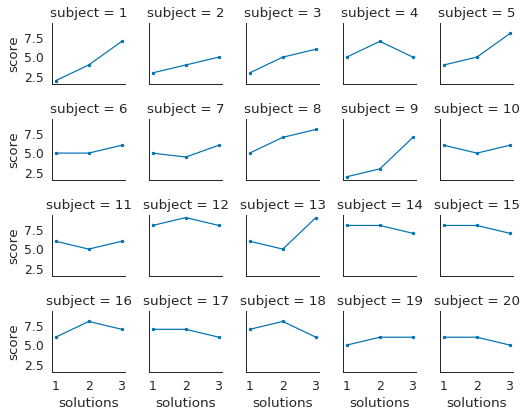

In [109]:
# col_wrap=5 means 5 subjects per line
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

# Regression Plots

<Figure size 576x432 with 0 Axes>

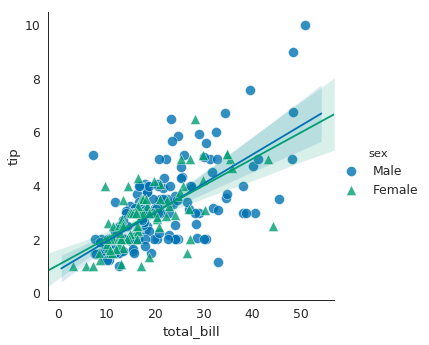

In [111]:
# 's':100 is the size of the markers

plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'],
          scatter_kws={'s':100, 'linewidth':.5, 'edgecolor':'white'})

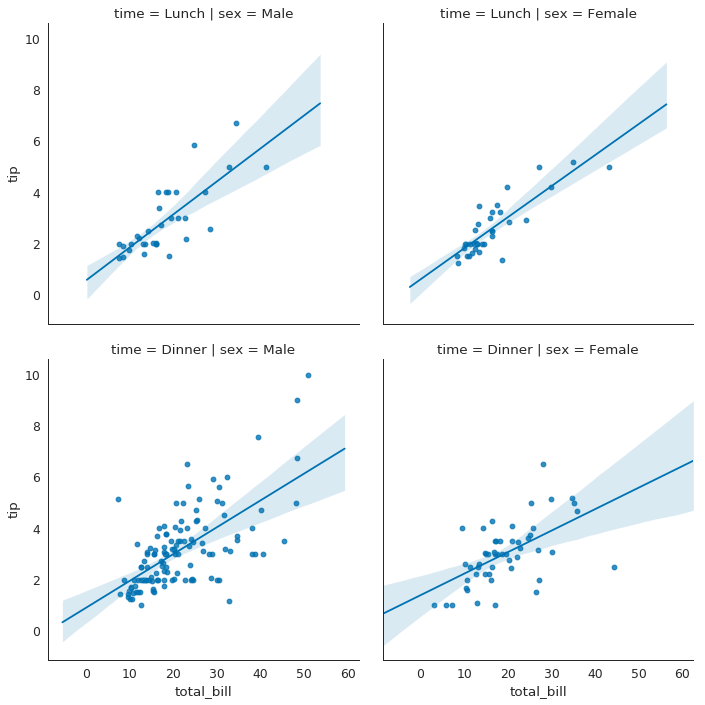

In [113]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)